#### 隐马尔可夫模型中的动态规划
这一小节是用来说明动态规划问题的，具体的技术细节对于理解深度学习模型并不重要，但它有助于我们思考为什么要使用深度学习，以及为什么要选择特定的架构。
如果我们想用概率图模型来解决这个问题，可以设计一个隐变量模型：在任意时间步t，假设存在某个隐变量ht，通过概率P (xt | ht)控制我们观测到的xt。此外，任何ht → ht+1转移都是由一些状态转移概率P (ht+1 | ht)给出。这个概率图模型就是一个隐马尔可夫模型（hidden Markov model，HMM），如 图9.4.1所示。
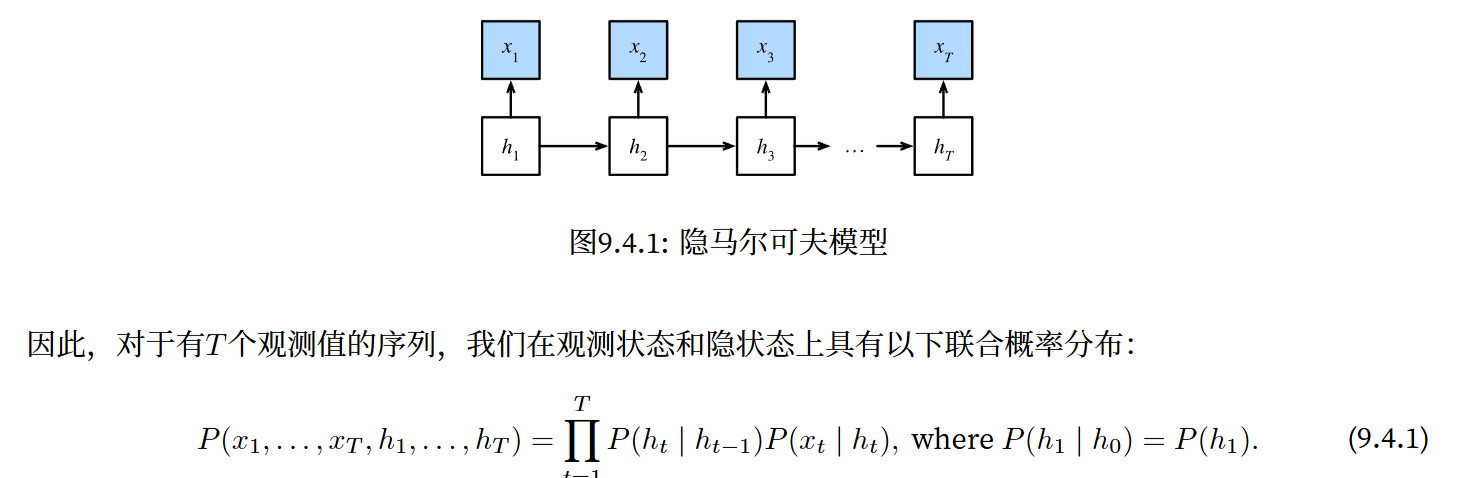

隐马尔可夫模型（HMM）：状态是 隐藏的，你只能看到“输出”
系统真正的状态 $s_t$ 是不可见的（比如：人的情绪）

每个状态 $s_t$ 会以一定概率“发射”一个观测值 $o_t$

公式结构：

状态转移概率：$P(s_t | s_{t-1})$

发射概率：$P(o_t | s_t)$

📦 HMM的组成（5个元素）：
状态集合 $S = {s_1, s_2, ..., s_N}$

观测集合 $O = {o_1, o_2, ..., o_M}$

初始概率分布 $\pi = P(s_1)$

状态转移矩阵 $A = P(s_t | s_{t-1})$

发射概率矩阵 $B = P(o_t | s_t)$

#### 双向模型
如果我们希望在循环神经网络中拥有一种机制，使之能够提供与隐马尔可夫模型类似的前瞻能力，我们就需要修改循环神经网络的设计。幸运的是，这在概念上很容易，只需要增加一个“从最后一个词元开始从后向前运行”的循环神经网络，而不是只有一个在前向模式下“从第一个词元开始运行”的循环神经网络。双向循环神经网络（bidirectional RNNs）添加了反向传递信息的隐藏层，以便更灵活地处理此类信息。图9.4.2描述了具有单个隐藏层的双向循环神经网络的架构。
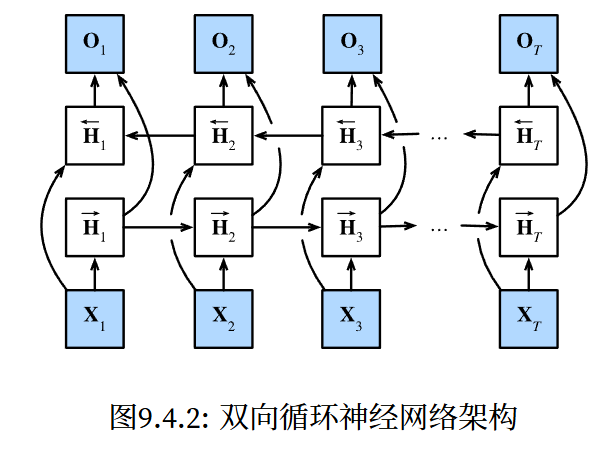

事实上，这与隐马尔可夫模型中的动态规划的前向和后向递归没有太大区别。其主要区别是，在隐马尔可夫模型中的方程具有特定的统计意义。双向循环神经网络没有这样容易理解的解释，我们只能把它们当作通用的、可学习的函数。这种转变集中体现了现代深度网络的设计原则：首先使用经典统计模型的函数依赖类型，然后将其参数化为通用形式。

双向循环神经网络的一个关键特性是：使用来自序列两端的信息来估计输出。也就是说，我们使用来自过去和未来的观测信息来预测当前的观测。但是在对下一个词元进行预测的情况中，这样的模型并不是我们所需的。因为在预测下一个词元时，我们终究无法知道下一个词元的下文是什么，所以将不会得到很好的精度。具体地说，在训练期间，我们能够利用过去和未来的数据来估计现在空缺的词；而在测试期间，我们只有过去的数据，因此精度将会很差。

另一个严重问题是，双向循环神经网络的计算速度非常慢。其主要原因是网络的前向传播需要在双向层中进行前向和后向递归，并且网络的反向传播还依赖于前向传播的结果。因此，梯度求解将有一个非常长的链。双向层的使用在实践中非常少，并且仅仅应用于部分场合。例如，填充缺失的单词、词元注释（例如，用于命名实体识别）以及作为序列处理流水线中的一个步骤对序列进行编码（例如，用于机器翻译）。在 14.8节和15.2节中，我们将介绍如何使用双向循环神经网络编码文本序列。

小结
- 在双向循环神经网络中，每个时间步的隐状态由当前时间步的前后数据同时决定。
- 双向循环神经网络与概率图模型中的“前向‐后向”算法具有相似性。
- 双向循环神经网络主要用于序列编码和给定双向上下文的观测估计。
- 由于梯度链更长，因此双向循环神经网络的训练代价非常高。